1. Генерация CSV-файла.
Файл 'lab2_data.csv' успешно создан!
Размер данных: (500, 3)

2. Построение графиков.


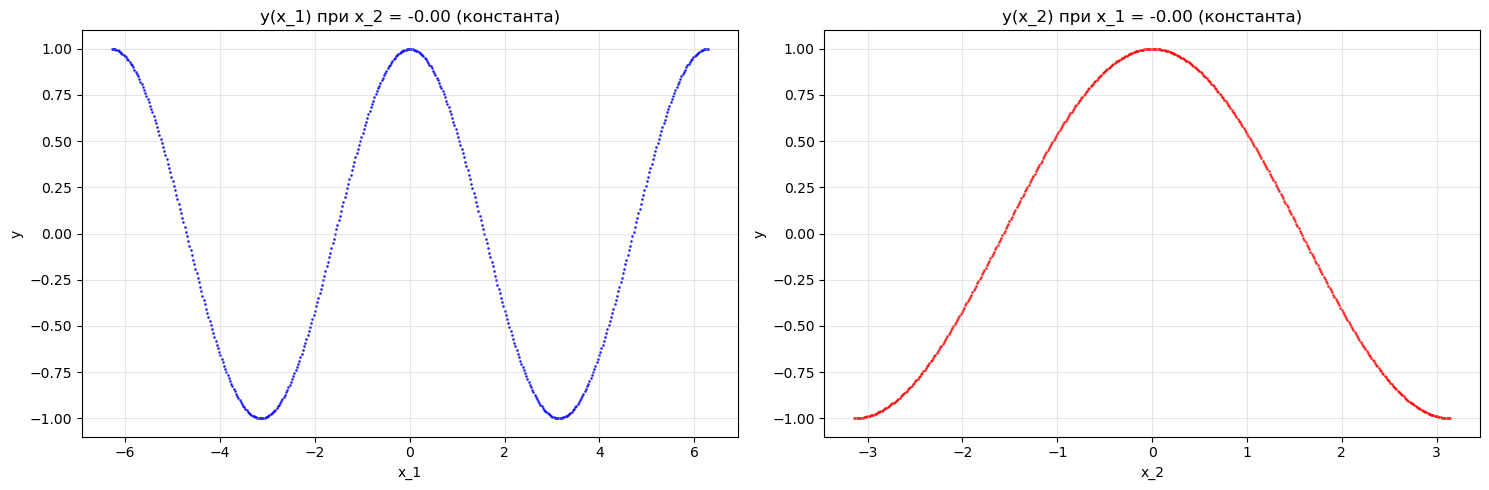

3. Статистика по столбцам:
Столбец x_1:
- Среднее: -0.0000
- Минимальное: -6.2832
- Максимальное: 6.2832

Столбец x_2:
- Среднее: -0.0000
- Минимальное: -3.1416
- Максимальное: 3.1416

Столбец y:
- Среднее: -0.0020
- Минимальное: -1.0000
- Максимальное: 1.0000

4. Сохранение отфильтрованных данных.
- Среднее x_1: -0.0000
- Среднее x_2: -0.0000

- Отфильтрованный файл 'lab2_filtered_data.csv' создан!
- Исходных строк: 500
- Отфильтрованных строк: 250

5. Построение 3D-графика.


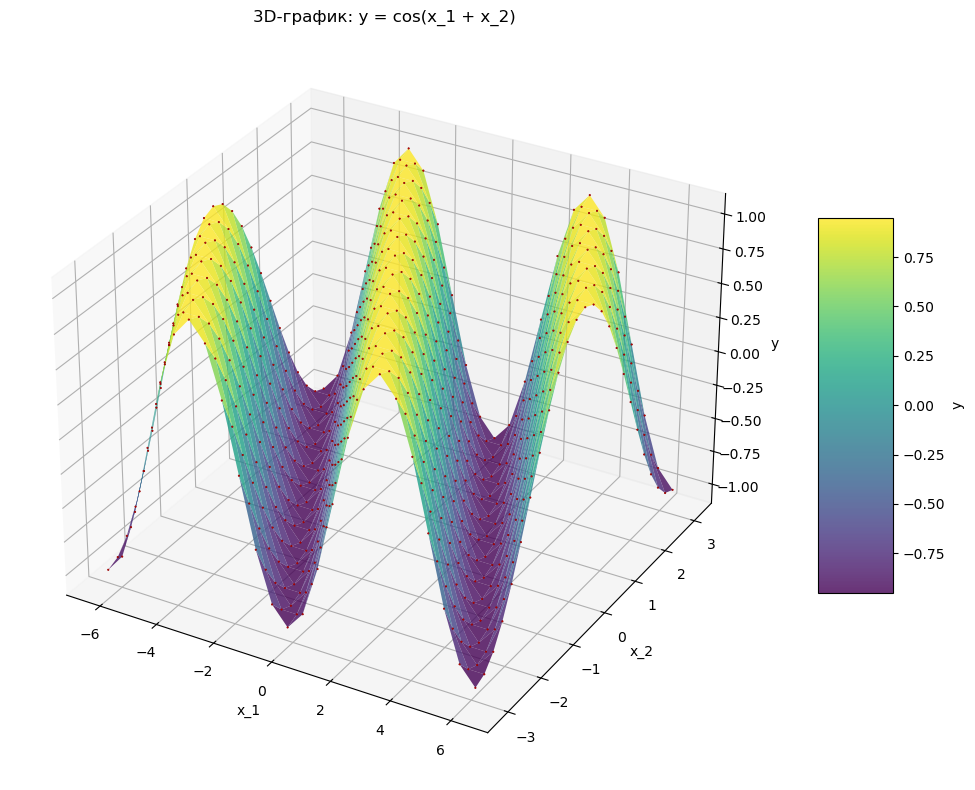

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

print("1. Генерация CSV-файла.")

n_points = 500
x1 = np.linspace(-2*np.pi, 2*np.pi, n_points)
x2 = np.linspace(-np.pi, np.pi, n_points)
y = np.cos(x1 + x2)

data = pd.DataFrame({
    'x_1': x1,
    'x_2': x2,
    'y': y
})

data.to_csv('lab2_data.csv', index=False)
print("Файл 'lab2_data.csv' успешно создан!")
print(f"Размер данных: {data.shape}\n")

print("2. Построение графиков.")

data = pd.read_csv('lab2_data.csv')

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
x2_const = data['x_2'].mean()

x1_for_plot = np.linspace(data['x_1'].min(), data['x_1'].max(), n_points)
y_for_plot_x1 = np.cos(x1_for_plot + x2_const)

plt.scatter(x1_for_plot, y_for_plot_x1, alpha=0.7, color='blue', s=1)
plt.xlabel('x_1')
plt.ylabel('y')
plt.title(f'y(x_1) при x_2 = {x2_const:.2f} (константа)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
x1_const = data['x_1'].mean()

x2_for_plot = np.linspace(data['x_2'].min(), data['x_2'].max(), n_points)
y_for_plot_x2 = np.cos(x1_const + x2_for_plot)

plt.scatter(x2_for_plot, y_for_plot_x2, alpha=0.7, color='red', s=1)
plt.xlabel('x_2')
plt.ylabel('y')
plt.title(f'y(x_2) при x_1 = {x1_const:.2f} (константа)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("3. Статистика по столбцам:")
for column in data.columns:
    print(f"Столбец {column}:")
    print(f"- Среднее: {data[column].mean():.4f}")
    print(f"- Минимальное: {data[column].min():.4f}")
    print(f"- Максимальное: {data[column].max():.4f}\n")

print("4. Сохранение отфильтрованных данных.")

mean_x1 = data['x_1'].mean()
mean_x2 = data['x_2'].mean()

print(f"- Среднее x_1: {mean_x1:.4f}")
print(f"- Среднее x_2: {mean_x2:.4f}\n")

filtered_data = data[(data['x_1'] < mean_x1) | (data['x_2'] < mean_x2)]

filtered_data.to_csv('lab2_filtered_data.csv', index=False)
print(f"- Отфильтрованный файл 'lab2_filtered_data.csv' создан!")
print(f"- Исходных строк: {len(data)}")
print(f"- Отфильтрованных строк: {len(filtered_data)}\n")

print("5. Построение 3D-графика.")

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

grid_resolution = 25
X1, X2 = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, grid_resolution), np.linspace(-np.pi, np.pi, grid_resolution))
Y = np.cos(X1 + X2)

surf = ax.plot_surface(X1, X2, Y, cmap='viridis', alpha=0.8, linewidth=0, edgecolor='none', antialiased=True)

ax.scatter(X1.flatten(), X2.flatten(), Y.flatten(), color='red', s=1, alpha=1.0, edgecolors='darkred', linewidth=0.5)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='y')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.set_title('3D-график: y = cos(x_1 + x_2)')

plt.tight_layout()
plt.show()